# TASK(22-09-2025)

In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("ScreenTime vs MentalWellness.csv")
df.head(3)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN


In [48]:
df.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,0.0
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750,NaN
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793,NaN
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000,NaN
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000,NaN
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000,NaN
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000,NaN
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [50]:
df.isnull().sum()

user_id                          0
age                              0
gender                           0
occupation                       0
work_mode                        0
screen_time_hours                0
work_screen_hours                0
leisure_screen_hours             0
sleep_hours                      0
sleep_quality_1_5                0
stress_level_0_10                0
productivity_0_100               0
exercise_minutes_per_week        0
social_hours_per_week            0
mental_wellness_index_0_100      0
Unnamed: 15                    400
dtype: int64

# Corelation Heatmap

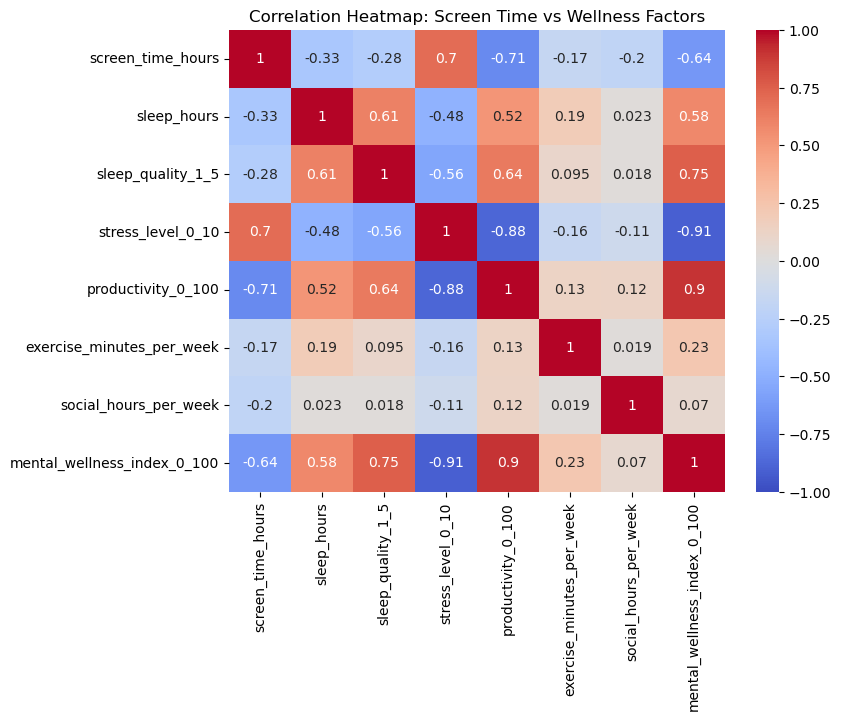

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    "screen_time_hours",
    "sleep_hours",
    "sleep_quality_1_5",
    "stress_level_0_10",
    "productivity_0_100",
    "exercise_minutes_per_week",
    "social_hours_per_week",
    "mental_wellness_index_0_100"
]


corr = df[cols].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Screen Time vs Wellness Factors")
plt.show()


# Regression model for Sleep Quality

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv("ScreenTime vs MentalWellness.csv")

features = [
    "screen_time_hours",
    "sleep_hours",
    "exercise_minutes_per_week",
    "social_hours_per_week",
    "productivity_0_100"
]


X = df[features + ["stress_level_0_10"]]
y = df["sleep_quality_1_5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Sleep Quality")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2_score(y_test, y_pred)*100:.2f}%\n")


X = df[features]  
y = df["stress_level_0_10"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Stress Level")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2_score(y_test, y_pred)*100:.2f}%")


Sleep Quality
Mean Squared Error: 0.19848907751854875
R² Score: 57.99%

Stress Level
Mean Squared Error: 1.0594827025969935
R² Score: 74.60%


# Clustering Users Health into Healthy and Risky

Cluster Centers:
    screen_time_hours  sleep_hours  sleep_quality_1_5  stress_level_0_10  \
0           9.950218     6.668036           1.094545           9.194909   
1           6.989200     7.772480           2.064000           5.852800   

   exercise_minutes_per_week  social_hours_per_week  \
0                  98.843636               7.614545   
1                 133.936000               8.544000   

   mental_wellness_index_0_100  
0                     9.373455  
1                    44.424000  


C:\Users\amaan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amaan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amaan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amaan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

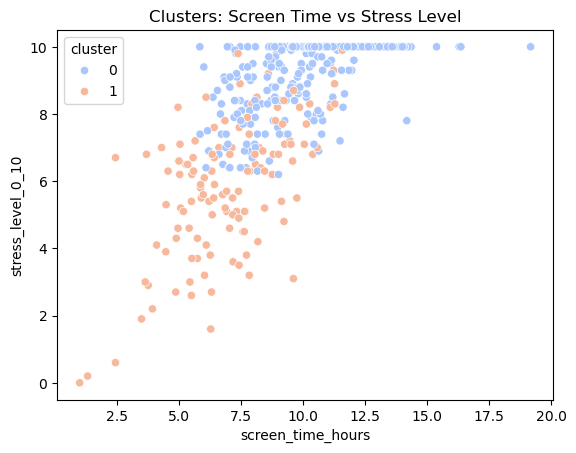

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    "screen_time_hours",
    "sleep_hours",
    "sleep_quality_1_5",
    "stress_level_0_10",
    "exercise_minutes_per_week",
    "social_hours_per_week",
    "mental_wellness_index_0_100"
]
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


kmeans = KMeans(n_clusters=2, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)
print("Cluster Centers:\n", centers)


sns.scatterplot(
    x="screen_time_hours", y="stress_level_0_10",
    hue="cluster", data=df, palette="coolwarm"
)
plt.title("Clusters: Screen Time vs Stress Level")
plt.show()
